In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [3]:
df = pd.read_csv("item_orders.csv")

/home/joaolrossi/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,order_id,date,item_code,unit_price_vat_excl,quantity,department,item_name,name,group1,country
0,2000093387,2020-04-24 00:00:00,S101,3.506048,1,E-COMMER,Dopravné,- žádný výrobce -,NaN,Hungary
1,2000093391,2020-04-24 00:00:00,S101,3.737403,1,E-COMMER,Dopravné,- žádný výrobce -,NaN,Slovakia
2,2000093394,2020-04-24 00:00:00,S101,3.171318,1,E-COMMER,Dopravné,- žádný výrobce -,NaN,Czech Republic
3,2000093395,2020-04-24 00:00:00,S101,2.850775,1,E-COMMER,Dopravné,- žádný výrobce -,NaN,Czech Republic
4,2000093400,2020-04-24 00:00:00,S101,3.336224,1,E-COMMER,Dopravné,- žádný výrobce -,NaN,Romania


In [5]:
def get_time_series(df_in, filter_in, frequency = "Daily"):
    
    """
    Returns the time series dataframe for given filter, frequency,  and imput dataframe
    
    df_in = Pandas dataframe
    filter_in = filter that will be applied on df_in dataframe. Example: df_in.group1 == "Running shoes"
    frequency = Daily, Weekly or Monthly
    """
    
    df_temp = df_in[filter_in]
    if frequency == "Daily":
        df_temp['date']=pd.to_datetime(df_temp['date'], format = "%Y-%m-%d")
        df_out = df_temp.groupby("date").sum()
    
    if frequency == "Weekly":
        date=pd.to_datetime('2019-06-01')
        df_temp['date']=pd.to_datetime(df_temp['date'], format = "%Y-%m-%d")
        df_out = df_temp.resample('W-{:%a}'.format(date), on='date').sum()
        df_out = df_out.iloc[1: , :] # dropping the first row as it is an incomplete week
    
    if frequency == "Monthly":
        date=pd.to_datetime('2019-06-01')
        df_temp['date']=pd.to_datetime(df_temp['date'], format = "%Y-%m-%d")
        df_out = df_temp.resample('M'.format(date), on='date').sum()
    
    return(df_out["quantity"])


In [6]:
filter_in =np.ones(df.shape[0], dtype=bool) #All records

### Sample Daily Data

In [7]:
daily_df = get_time_series(df, filter_in = filter_in, frequency = "Daily")

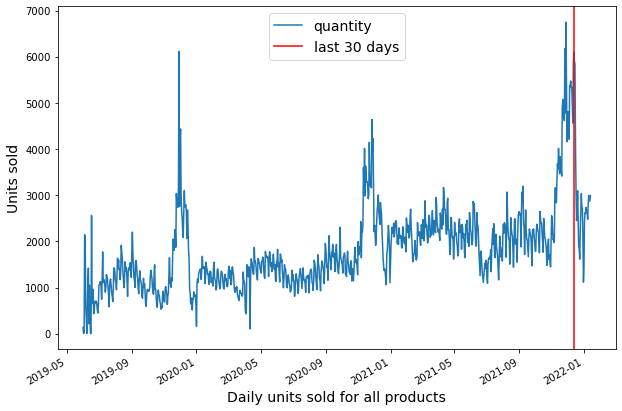

In [36]:
daily_df.plot(figsize = (10,7))
pyplot.xlabel('Daily units sold for all products', fontsize=14)
pyplot.ylabel('Units sold', fontsize=14)
pyplot.axvline(x="2021-12-14", color='r', label='last 30 days')
pyplot. legend(fontsize=14);

In [34]:
daily_df.to_csv("Daily_all.csv")

### Sample Weekly Data

In [35]:
weekly_df = get_time_series(df, filter_in = filter_in, frequency = "Weekly")

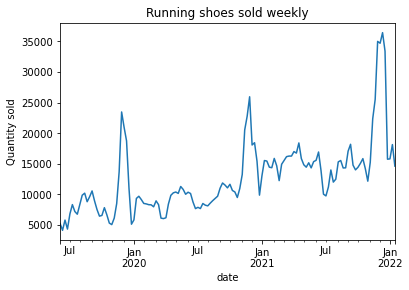

In [36]:
weekly_df.plot(ylabel = "Quantity sold", title = "Weekly units sold for all products");

In [37]:
weekly_df.to_csv("Weekly_all.csv")

### Sample Monthly Data

In [38]:
monthly_df = get_time_series(df, filter_in = filter_in, frequency = "Monthly")

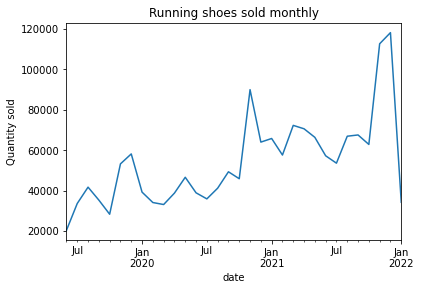

In [39]:
monthly_df.plot(ylabel = "Quantity sold", title = "Monthly units sold for all products");

In [40]:
monthly_df.to_csv("Monthly_all.csv")